# Effect of $m$ (number of neurons)

In this notebook, we will discuss the impact of $m$, which will determine the distance from initialzation to the solution. As $m\rightarrow\infty$, the NN will converge to NTK with closer solution near initalization.

In [1]:
import torch
from torch import optim, nn
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import random
from models import train, train_2, train_standard
# training parameters
batch_size = 128

transform = transforms.Compose([
        transforms.ToTensor()
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

h_dim = 10000
train_epoch = 50
alpha_set = [h_dim**(0.1*k) for k in range(11)]

## Scaling $\eta_u/\eta_\theta = m/\alpha$

In [2]:
h_dim = 100
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]
sr2,sa2,sl2 = train_standard(train_loader,test_loader,h_dim,alpha,train_epoch,.1)
h_dim = 1000
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]
sr3,sa3,sl3 = train_standard(train_loader,test_loader,h_dim,alpha,train_epoch,.1)
h_dim = 10000
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]
sr4,sa4,sl4 = train_standard(train_loader,test_loader,h_dim,alpha,train_epoch,.1)

epoch 0 loss (train,test):5.88e-01;5.34e-01 acc:0.836500
dtheta: 0.16172475
du: 5.544675588607788
epoch 1 loss (train,test):4.34e-01;4.77e-01 acc:0.852400
dtheta: 0.26616725
du: 6.5452903509140015
epoch 2 loss (train,test):4.47e-01;4.51e-01 acc:0.862300
dtheta: 0.35530776
du: 7.098937034606934
epoch 3 loss (train,test):4.16e-01;4.23e-01 acc:0.867800
dtheta: 0.43447658
du: 7.472906708717346
epoch 4 loss (train,test):4.30e-01;4.08e-01 acc:0.873200
dtheta: 0.50576466
du: 7.739339470863342
epoch 5 loss (train,test):3.94e-01;3.97e-01 acc:0.876500
dtheta: 0.5707027
du: 7.966552972793579
epoch 6 loss (train,test):3.65e-01;3.86e-01 acc:0.879400
dtheta: 0.63121516
du: 8.150607347488403
epoch 7 loss (train,test):3.87e-01;3.80e-01 acc:0.882300
dtheta: 0.68836844
du: 8.296810388565063
epoch 8 loss (train,test):3.48e-01;3.68e-01 acc:0.883700
dtheta: 0.7423303
du: 8.435753583908081
epoch 9 loss (train,test):3.61e-01;3.62e-01 acc:0.886700
dtheta: 0.79383206
du: 8.557771444320679
epoch 10 loss (train,

epoch 34 loss (train,test):4.33e-02;1.91e-01 acc:0.945100
dtheta: 0.24247491
du: 14.25450541331288
epoch 35 loss (train,test):4.00e-02;1.99e-01 acc:0.943300
dtheta: 0.24745828
du: 14.41115554835183
epoch 36 loss (train,test):4.06e-02;1.98e-01 acc:0.943100
dtheta: 0.25233865
du: 14.563257505675251
epoch 37 loss (train,test):3.42e-02;1.98e-01 acc:0.944500
dtheta: 0.25711152
du: 14.713953354181518
epoch 38 loss (train,test):3.61e-02;1.95e-01 acc:0.944300
dtheta: 0.26181027
du: 14.861345977886097
epoch 39 loss (train,test):4.65e-02;1.97e-01 acc:0.944500
dtheta: 0.26638803
du: 15.004126338486698
epoch 40 loss (train,test):3.19e-02;1.98e-01 acc:0.944600
dtheta: 0.27086744
du: 15.1459765185226
epoch 41 loss (train,test):3.10e-02;1.98e-01 acc:0.944300
dtheta: 0.27527288
du: 15.28539805082271
epoch 42 loss (train,test):2.82e-02;2.00e-01 acc:0.942800
dtheta: 0.27957568
du: 15.420183759214265
epoch 43 loss (train,test):3.45e-02;2.03e-01 acc:0.942000
dtheta: 0.28375718
du: 15.553935619500983
epoch

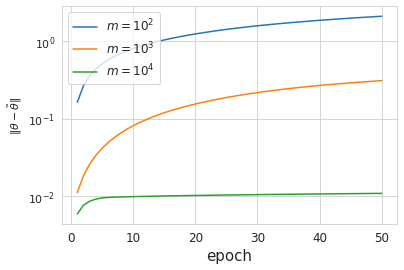

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


#plt.plot(np.arange(50)+1,np.array(sr1)[:,0],label = r'$m = 10$')
plt.plot(np.arange(train_epoch)+1,np.array(sr2)[:,0],label = r'$m = 10^2$')
plt.plot(np.arange(train_epoch)+1,np.array(sr3)[:,0],label = r'$m = 10^3$')
plt.plot(np.arange(train_epoch)+1,np.array(sr4)[:,0],label = r'$m = 10^4$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert \theta-\tilde{\theta} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
#plt.ylim([0.1,10])
plt.yscale('log')

## Scaling $\eta_u/\eta_\theta  = 1$

In [4]:
h_dim = 100
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]
r2_,a2_,l2_ = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1*10)
h_dim = 1000
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]
r3_,a3_,l3_ = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1*np.sqrt(10))
h_dim = 10000
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]
r4_,a4_,l4_ = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1)

Seed: 2020
epoch 0 loss (train,test):3.04e-01;2.70e-01 acc:0.920900
dtheta: 4.2812114
du: 3.2946398
epoch 1 loss (train,test):1.92e-01;2.24e-01 acc:0.934600
dtheta: 5.407549
du: 3.9848492
epoch 2 loss (train,test):1.93e-01;1.97e-01 acc:0.940900
dtheta: 6.183351
du: 4.46396
epoch 3 loss (train,test):1.67e-01;1.81e-01 acc:0.946400
dtheta: 6.773403
du: 4.8632283
epoch 4 loss (train,test):1.44e-01;1.65e-01 acc:0.951300
dtheta: 7.255207
du: 5.2203865
epoch 5 loss (train,test):1.35e-01;1.60e-01 acc:0.953100
dtheta: 7.6797514
du: 5.558745
epoch 6 loss (train,test):1.42e-01;1.54e-01 acc:0.952800
dtheta: 8.05388
du: 5.8695025
epoch 7 loss (train,test):9.44e-02;1.53e-01 acc:0.956400
dtheta: 8.377589
du: 6.1580443
epoch 8 loss (train,test):7.16e-02;1.44e-01 acc:0.955800
dtheta: 8.682826
du: 6.432184
epoch 9 loss (train,test):9.64e-02;1.41e-01 acc:0.956000
dtheta: 8.947188
du: 6.6838155
epoch 10 loss (train,test):8.95e-02;1.35e-01 acc:0.959200
dtheta: 9.179816
du: 6.9306407
epoch 11 loss (train,te

epoch 42 loss (train,test):7.02e-03;1.01e-01 acc:0.967300
dtheta: 3.7801142
du: 3.5877583
epoch 43 loss (train,test):8.24e-03;1.01e-01 acc:0.967500
dtheta: 3.7938795
du: 3.609599
epoch 44 loss (train,test):7.07e-03;1.01e-01 acc:0.967500
dtheta: 3.8072371
du: 3.6308048
epoch 45 loss (train,test):6.20e-03;1.05e-01 acc:0.967400
dtheta: 3.8201475
du: 3.651581
epoch 46 loss (train,test):6.06e-03;1.00e-01 acc:0.967500
dtheta: 3.8326163
du: 3.6718113
epoch 47 loss (train,test):5.65e-03;1.00e-01 acc:0.967700
dtheta: 3.844916
du: 3.6916072
epoch 48 loss (train,test):5.86e-03;1.02e-01 acc:0.967600
dtheta: 3.8568246
du: 3.7109249
epoch 49 loss (train,test):6.84e-03;1.03e-01 acc:0.967600
dtheta: 3.868501
du: 3.72979
Seed: 2020
epoch 0 loss (train,test):2.28e-01;2.41e-01 acc:0.932100
dtheta: 0.43857437
du: 0.3213356
epoch 1 loss (train,test):1.72e-01;2.03e-01 acc:0.943300
dtheta: 0.5428889
du: 0.38189384
epoch 2 loss (train,test):1.61e-01;1.81e-01 acc:0.947200
dtheta: 0.6189722
du: 0.42510015
epoch

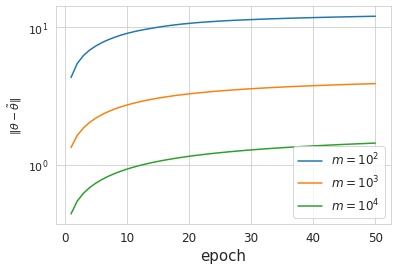

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


#plt.plot(np.arange(50)+1,np.array(sr1)[:,0],label = r'$m = 10$')
plt.plot(np.arange(train_epoch)+1,np.array(r2_)[:,0],label = r'$m = 10^2$')
plt.plot(np.arange(train_epoch)+1,np.array(r3_)[:,0],label = r'$m = 10^3$')
plt.plot(np.arange(train_epoch)+1,np.array(r4_)[:,0],label = r'$m = 10^4$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert \theta-\tilde{\theta} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
#plt.ylim([0.1,10])
plt.yscale('log')

In [6]:
h_dim = 100
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]
r2,a2,l2 = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1)
h_dim = 1000
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]
r3,a3,l3 = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1)
h_dim = 10000
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]
r4,a4,l4 = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1)

Seed: 2020
epoch 0 loss (train,test):6.39e-01;6.07e-01 acc:0.830600
dtheta: 1.7903585
du: 1.543241
epoch 1 loss (train,test):4.16e-01;4.57e-01 acc:0.872000
dtheta: 2.3112714
du: 2.0011065
epoch 2 loss (train,test):3.95e-01;3.95e-01 acc:0.889100
dtheta: 2.6450043
du: 2.2808073
epoch 3 loss (train,test):3.57e-01;3.53e-01 acc:0.899600
dtheta: 2.901291
du: 2.487159
epoch 4 loss (train,test):3.53e-01;3.27e-01 acc:0.905500
dtheta: 3.1136277
du: 2.6497276
epoch 5 loss (train,test):3.16e-01;3.09e-01 acc:0.909800
dtheta: 3.2943902
du: 2.7883072
epoch 6 loss (train,test):2.99e-01;2.94e-01 acc:0.913900
dtheta: 3.4579825
du: 2.908071
epoch 7 loss (train,test):2.89e-01;2.84e-01 acc:0.918900
dtheta: 3.6027417
du: 3.0155463
epoch 8 loss (train,test):2.42e-01;2.70e-01 acc:0.921000
dtheta: 3.7369306
du: 3.1159077
epoch 9 loss (train,test):2.45e-01;2.61e-01 acc:0.923300
dtheta: 3.8587844
du: 3.2073956
epoch 10 loss (train,test):2.57e-01;2.54e-01 acc:0.924200
dtheta: 3.973956
du: 3.29375
epoch 11 loss (t

epoch 42 loss (train,test):3.42e-02;1.19e-01 acc:0.962500
dtheta: 2.876601
du: 2.4700758
epoch 43 loss (train,test):4.27e-02;1.19e-01 acc:0.962000
dtheta: 2.895458
du: 2.4919446
epoch 44 loss (train,test):3.45e-02;1.18e-01 acc:0.962400
dtheta: 2.9137723
du: 2.5133872
epoch 45 loss (train,test):3.12e-02;1.22e-01 acc:0.962900
dtheta: 2.9317038
du: 2.534522
epoch 46 loss (train,test):3.04e-02;1.17e-01 acc:0.962900
dtheta: 2.9490683
du: 2.555235
epoch 47 loss (train,test):2.58e-02;1.17e-01 acc:0.962700
dtheta: 2.9661562
du: 2.575646
epoch 48 loss (train,test):2.93e-02;1.19e-01 acc:0.962800
dtheta: 2.9827998
du: 2.5957327
epoch 49 loss (train,test):3.49e-02;1.19e-01 acc:0.963200
dtheta: 2.999226
du: 2.6154914
Seed: 2020
epoch 0 loss (train,test):2.28e-01;2.41e-01 acc:0.932100
dtheta: 0.43857437
du: 0.3213356
epoch 1 loss (train,test):1.72e-01;2.03e-01 acc:0.943300
dtheta: 0.5428889
du: 0.38189384
epoch 2 loss (train,test):1.61e-01;1.81e-01 acc:0.947200
dtheta: 0.6189722
du: 0.42510015
epoch

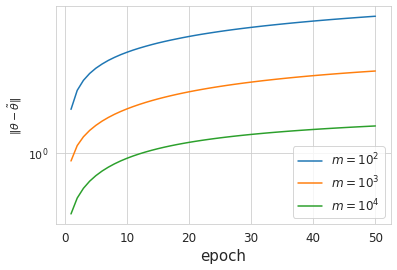

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


#plt.plot(np.arange(50)+1,np.array(sr1)[:,0],label = r'$m = 10$')
plt.plot(np.arange(train_epoch)+1,np.array(r2)[:,0],label = r'$m = 10^2$')
plt.plot(np.arange(train_epoch)+1,np.array(r3)[:,0],label = r'$m = 10^3$')
plt.plot(np.arange(train_epoch)+1,np.array(r4)[:,0],label = r'$m = 10^4$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert \theta-\tilde{\theta} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
#plt.ylim([0.1,10])
plt.yscale('log')